In [1]:
from typing_extensions import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [2]:
class AgentState(TypedDict):
  name : str
  numbers: List[int]
  counter: int

In [ ]:
def greeting_node(state : AgentState) -> AgentState:
  """Node to greet the user"""

  state['name'] = f"Hi {state['name']}"
  state['counter'] = 0 #initializing default value
  return state

def random_numbers(state : AgentState) -> AgentState:
  """Node to generate random numbers"""
  
  state['numbers'].append(random.randint(0 , 10))
  state['counter'] += 1
  return state

def should_continue(state : AgentState) -> AgentState:
  """Node to decide whether the loop should ocntinue or not"""
  
  if state['counter'] < 5:
    print("ENTERING LOOP" , state['counter'])
    return "loop"
  else : 
    return "end"


In [4]:
graph = StateGraph(AgentState)

graph.add_node("greeter" , greeting_node)
graph.add_node("random" , random_numbers)

graph.add_edge(START, "greeter")
graph.add_edge("greeter" , "random")
graph.add_conditional_edges(
  "random", #source node
  should_continue, #routing function
  {
    "loop" : "random", #self looping
    "end" : END #end
  }
)

app = graph.compile()

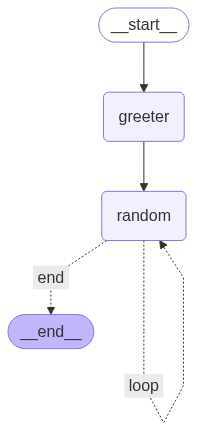

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
res = app.invoke({"name" : "Shyam", "numbers" : [], "counter" : 1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


In [8]:
print(res)

{'name': 'Hi Shyam', 'numbers': [8, 6, 2, 0, 1], 'counter': 5}
